In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import openpyxl
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,auc,f1_score,precision_recall_curve,precision_score,recall_score,confusion_matrix, classification_report

In [5]:
inspection = pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv')
violation = pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_VIOLATIONS.csv')
sid = pd.read_excel(r'C:\Users\nick2\Desktop\INFORMAC\sid.xlsx')
newdata= pd.read_csv(r'C:\Users\nick2\Desktop\INFORMAC\external_crime_data.csv')
# insprection changes to external crime data

In [6]:
inspection.columns

Index(['ACTIVITY DATE', 'OWNER ID', 'OWNER NAME', 'FACILITY ID',
       'FACILITY NAME', 'RECORD ID', 'PROGRAM NAME', 'PROGRAM STATUS',
       'PROGRAM ELEMENT (PE)', 'PE DESCRIPTION', 'FACILITY ADDRESS',
       'FACILITY CITY', 'FACILITY STATE', 'FACILITY ZIP', 'SERVICE CODE',
       'SERVICE DESCRIPTION', 'SCORE', 'GRADE', 'SERIAL NUMBER',
       'EMPLOYEE ID'],
      dtype='object')

In [7]:
inspection.head()

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID
0,06/01/2016,OW0022471,LUCY'S DRIVE THRU INC,FA0003655,5 DE MAYO,PR0005766,5 DE MAYO,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,11204 WASHINGTON PL,CULVER CITY,CA,90230,1,ROUTINE INSPECTION,91,A,DA3BPLKQP,EE0001002
1,06/01/2016,OW0124734,PAUL V ANAND,FA0159730,7-ELEVEN STORE 18341D,PR0147792,7-ELEVEN STORE 18341D,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",14102 SHERMAN WAY,VAN NUYS,CA,91405,1,ROUTINE INSPECTION,93,A,DAXEB48KD,EE0000314
2,06/01/2016,OW0182158,"CHARR, INC",FA0175631,7-ELEVEN STORE 37021A,PR0168801,7-ELEVEN STORE 37021A,ACTIVE,1611,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",15228 S AVALON BLVD,COMPTON,CA,90220,1,ROUTINE INSPECTION,97,A,DAF9FSRPL,EE0000249
3,06/01/2016,OW0023416,"MARISCAL, ESTELA",FA0056876,98 CENT DISCOUT STORE & MKT,PR0020223,98 CENT DISCOUT STORE & MKT,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",2871 E GAGE AVE,HUNTINGTON PARK,CA,90255,1,ROUTINE INSPECTION,95,A,DASO8SP68,EE0000965
4,06/01/2016,OW0035124,"TAWA SUPERMARKET, INC",FA0002592,99 RANCH MARKET #7,PR0026148,99 RANCH MARKET #7 BAKERY,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,1300 S GOLDEN WEST AVE,ARCADIA,CA,91007,1,ROUTINE INSPECTION,95,A,DAC2ZIB6J,EE0000120


In [8]:
violation.head()

,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
0,DAGRXVWSO,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
1,DAYUDBQIK,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
2,DASDXDAHG,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
3,DA5XOQL4U,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0
4,DAQ9DOC70,OUT OF COMPLIANCE,F043,# 43. Premises; personal/cleaning items; vermi...,1.0


In [9]:
inspection['GRADE'].fillna('D',inplace=True)

In [10]:
inspection.shape

(204953, 20)

In [11]:
inspection=inspection[inspection['GRADE']!='D']
inspection.shape

(204892, 20)

In [12]:
data=inspection.drop(columns=['FACILITY NAME','PROGRAM NAME','FACILITY ADDRESS','FACILITY CITY','SERIAL NUMBER','EMPLOYEE ID','SERVICE DESCRIPTION','FACILITY STATE','RECORD ID','OWNER ID','OWNER NAME','ACTIVITY DATE'],axis=1)

In [13]:
# Converting Zipcode into numeric
def break_string3(x):
    return x.split('-')[0]
data['FACILITY ZIP'] = data['FACILITY ZIP'].astype(str).apply(break_string3)
data['FACILITY ZIP']=pd.to_numeric(data['FACILITY ZIP'])

In [14]:
data.head()

,FACILITY ID,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ZIP,SERVICE CODE,SCORE,GRADE
0,FA0003655,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,90230,1,91,A
1,FA0159730,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",91405,1,93,A
2,FA0175631,ACTIVE,1611,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",90220,1,97,A
3,FA0056876,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",90255,1,95,A
4,FA0002592,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,91007,1,95,A


In [15]:
data1=data

def break_string(x):
    return x.split(' ')[-2]
data1['risk'] = data1['PE DESCRIPTION'].astype(str).apply(break_string)

def break_string1(x):
    return x.split(' ')[1]
data1['whatever'] = data1['PE DESCRIPTION'].astype(str).apply(break_string1)

def break_string2(x):
    return x.split(' ')[0]
data1['Description_PE'] = data1['PE DESCRIPTION'].astype(str).apply(break_string2)

a=['HIGH', 'MODERATE', 'LOW', 'SF)HIGH', 'MOD']
data1=data1[data1['risk'].isin(a)]

data1.risk.replace(['SF)HIGH', 'MOD'], ['HIGH', 'MODERATE'], inplace=True)

b=['RESTAURANT', 'FOOD']
data1=data1[data1['Description_PE'].isin(b)]

data2=data1.drop(columns=['PE DESCRIPTION','whatever'],axis=1)

print(data2.shape)


(204752, 9)


In [16]:
data2.head(3)

,FACILITY ID,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,FA0003655,ACTIVE,1632,90230,1,91,A,HIGH,RESTAURANT
1,FA0159730,ACTIVE,1614,91405,1,93,A,MODERATE,FOOD
2,FA0175631,ACTIVE,1611,90220,1,97,A,MODERATE,FOOD


In [17]:
data2["Description_PE"]=data2["Description_PE"].map({'FOOD': 0, 'RESTAURANT': 1})
data2['risk'] = data2['risk'].map({'HIGH': 3, 'MODERATE': 2, 'LOW':1})
data2['PROGRAM STATUS'] = data2['PROGRAM STATUS'].map({'ACTIVE': 1, 'INACTIVE':0})
data2['SERVICE CODE'] = data2['SERVICE CODE'].map({1: 1, 401:0})

In [18]:
data2.head()

,FACILITY ID,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,FA0003655,1,1632,90230,1,91,A,3,1
1,FA0159730,1,1614,91405,1,93,A,2,0
2,FA0175631,1,1611,90220,1,97,A,2,0
3,FA0056876,1,1610,90255,1,95,A,1,0
4,FA0002592,1,1631,91007,1,95,A,2,1


In [19]:
dataframe = pd.DataFrame(columns=data2.columns)
dataframe 

,FACILITY ID,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE


In [20]:
dataframe['SCORE']=data2.groupby('FACILITY ID')['SCORE'].mean()
dataframe['risk']=data2.groupby('FACILITY ID')['risk'].median()
dataframe['PROGRAM STATUS']=data2.groupby('FACILITY ID')['PROGRAM STATUS'].mean()
dataframe['FACILITY ZIP']=data2.groupby('FACILITY ID')['FACILITY ZIP'].median()
dataframe['SERVICE CODE']=data2.groupby('FACILITY ID')['SERVICE CODE'].median()
dataframe['PROGRAM ELEMENT (PE)']=data2.groupby('FACILITY ID')['PROGRAM ELEMENT (PE)'].median()
dataframe['Description_PE']=data2.groupby('FACILITY ID')['Description_PE'].median()

In [21]:
df=dataframe.drop('FACILITY ID',axis=1)

In [22]:
df=df.reset_index(level=None)
df1=df.drop('FACILITY ID',axis=1)
df1.head()

,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,1.0,1640.0,90026,1.0,94.250000,NaN,2.0,1.0
1,0.0,1638.0,91001,1.0,92.333333,NaN,3.0,1.0
2,1.0,1610.0,90016,1.0,96.333333,NaN,1.0,0.0
3,1.0,1641.0,90240,1.0,92.833333,NaN,3.0,1.0
4,1.0,1637.0,90066,1.0,95.000000,NaN,2.0,1.0


In [23]:
df1.shape

(44797, 8)

In [24]:
for k in range(0,44797):
    a=df1.iat[k,4]
    if a>=90:
        df1.iat[k,5]='A'
    if a>=80 and a<90:
        df1.iat[k,5]='B'
    if a<80:
        df1.iat[k,5]='C'

In [25]:
df1.head()

,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,1.0,1640.0,90026,1.0,94.250000,A,2.0,1.0
1,0.0,1638.0,91001,1.0,92.333333,A,3.0,1.0
2,1.0,1610.0,90016,1.0,96.333333,A,1.0,0.0
3,1.0,1641.0,90240,1.0,92.833333,A,3.0,1.0
4,1.0,1637.0,90066,1.0,95.000000,A,2.0,1.0


In [26]:
df1.shape

(44797, 8)

### Correcting for risk

In [27]:
for k in range(0,44797):
    a=df1.iat[k,6]
    if a>=2.5:
        df1.iat[k,6]=3
    if a>=1.5 and a<=2:
        df1.iat[k,6]=2

In [28]:
df1['GRADE'] = data2['GRADE'].map({'A': 3, 'B':2,'C':1})

In [29]:
df1.head()

,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,1.0,1640.0,90026,1.0,94.250000,3.0,2.0,1.0
1,0.0,1638.0,91001,1.0,92.333333,3.0,3.0,1.0
2,1.0,1610.0,90016,1.0,96.333333,3.0,1.0,0.0
3,1.0,1641.0,90240,1.0,92.833333,3.0,3.0,1.0
4,1.0,1637.0,90066,1.0,95.000000,3.0,2.0,1.0


### K-means

In [30]:
inspection.head(2)

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID
0,06/01/2016,OW0022471,LUCY'S DRIVE THRU INC,FA0003655,5 DE MAYO,PR0005766,5 DE MAYO,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,11204 WASHINGTON PL,CULVER CITY,CA,90230,1,ROUTINE INSPECTION,91,A,DA3BPLKQP,EE0001002
1,06/01/2016,OW0124734,PAUL V ANAND,FA0159730,7-ELEVEN STORE 18341D,PR0147792,7-ELEVEN STORE 18341D,ACTIVE,1614,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",14102 SHERMAN WAY,VAN NUYS,CA,91405,1,ROUTINE INSPECTION,93,A,DAXEB48KD,EE0000314


In [31]:
def break_string3(x):
    return x.split('-')[0]
inspection['FACILITY ZIP'] = inspection['FACILITY ZIP'].astype(str).apply(break_string3)
inspection['FACILITY ZIP']=pd.to_numeric(inspection['FACILITY ZIP'])

In [32]:
X=inspection.iloc[:,[13,16]].values

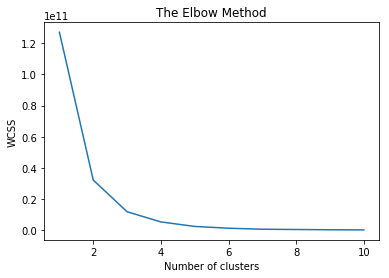

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

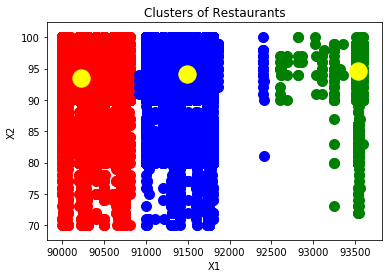

In [35]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Restaurants')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.legend()
plt.show()

In [36]:
inspection['cluster']=y_kmeans

cluster 1: 90001-90813

cluster 2: 90921-92410

cluster 3 : >92602


### Cluster-2

In [37]:
df1.head()

,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,1.0,1640.0,90026,1.0,94.250000,3.0,2.0,1.0
1,0.0,1638.0,91001,1.0,92.333333,3.0,3.0,1.0
2,1.0,1610.0,90016,1.0,96.333333,3.0,1.0,0.0
3,1.0,1641.0,90240,1.0,92.833333,3.0,3.0,1.0
4,1.0,1637.0,90066,1.0,95.000000,3.0,2.0,1.0


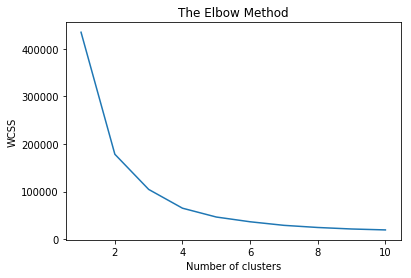

In [38]:
x = df1.dropna()
X=x.iloc[:,[4,7]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

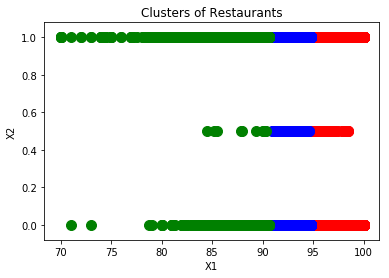

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Restaurants')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.legend()
plt.show()

# Naive Bayes

In [40]:
df2=df1.dropna()
df2.head()

,PROGRAM STATUS,PROGRAM ELEMENT (PE),FACILITY ZIP,SERVICE CODE,SCORE,GRADE,risk,Description_PE
0,1.0,1640.0,90026,1.0,94.250000,3.0,2.0,1.0
1,0.0,1638.0,91001,1.0,92.333333,3.0,3.0,1.0
2,1.0,1610.0,90016,1.0,96.333333,3.0,1.0,0.0
3,1.0,1641.0,90240,1.0,92.833333,3.0,3.0,1.0
4,1.0,1637.0,90066,1.0,95.000000,3.0,2.0,1.0


In [41]:
X=df2.drop(columns=['SCORE','GRADE'],axis=1)
y=df2['GRADE']

In [42]:
grade1_index=y[y.values==1].index
grade2_index=y[y.values==2].index
grade3_index=y[y.values==3].index

lower=grade1_index
higher=grade2_index
highest=grade3_index


# remember higher is a list of indexes, either of 0 or 1's in the response variable in training set
higher=np.random.choice(higher, size=len(lower))
highest=np.random.choice(highest, size=len(lower))

lower=np.asarray(lower)

new_indexes=np.concatenate((lower,higher,highest))

X=X.loc[new_indexes,]
y=y.loc[new_indexes]

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
'''from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.36231884057971014
0.30434782608695654


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.28      0.57      0.37        21
         2.0       0.36      0.43      0.39        21
         3.0       0.00      0.00      0.00        27

   micro avg       0.30      0.30      0.30        69
   macro avg       0.21      0.33      0.26        69
weighted avg       0.19      0.30      0.23        69



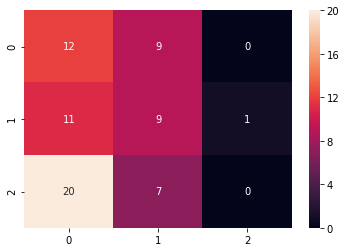

In [46]:
sns.heatmap(cm, annot=True,fmt='g')

